# **1. 정상 시계열**
- 정상성 (Stationarity)
정상성은 시계열 데이터의 통계적 특성이 시간에 따라 변하지 않는 것을 의미
- 정상성을 가진 데이터는 평균, 분산, 자기상관 구조가 일정

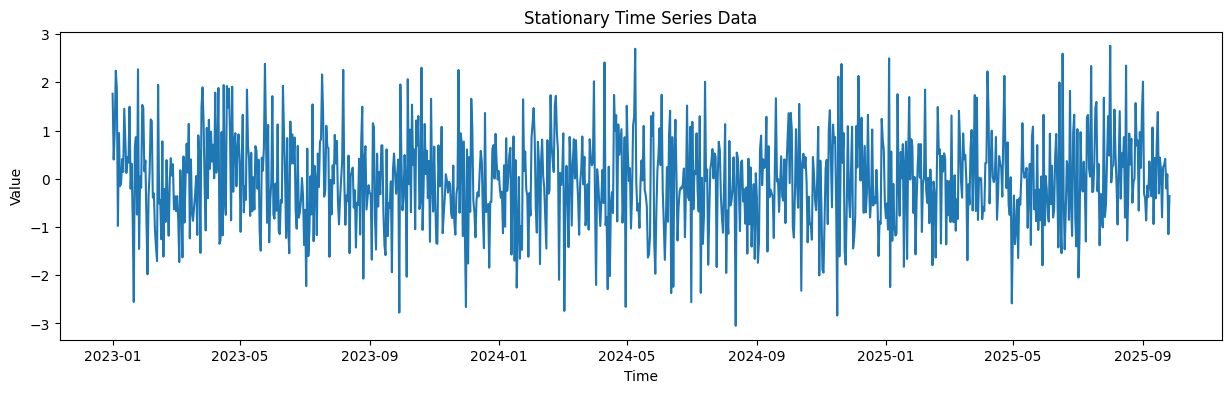

ADF Statistic: -32.462559337689974
p-value: 0.0


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# 정상적인 시계열 데이터 생성
np.random.seed(0)
stationary_data = np.random.normal(loc=0, scale=1, size=1000)
time_index = pd.date_range(start='2023-01-01', periods=1000, freq='D')
stationary_series = pd.Series(stationary_data, index=time_index)

# ADF 테스트
adf_result = adfuller(stationary_series)

# 시각화
plt.figure(figsize=(15, 4))
plt.plot(stationary_series)
plt.title('Stationary Time Series Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

# ADF 테스트 결과 출력
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])


<ipython-input-16-89a85b63c8ac>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(stationary_data, hist=True, kde=True, color='blue', kde_kws={'shade': True, 'linewidth': 3})
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2496: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


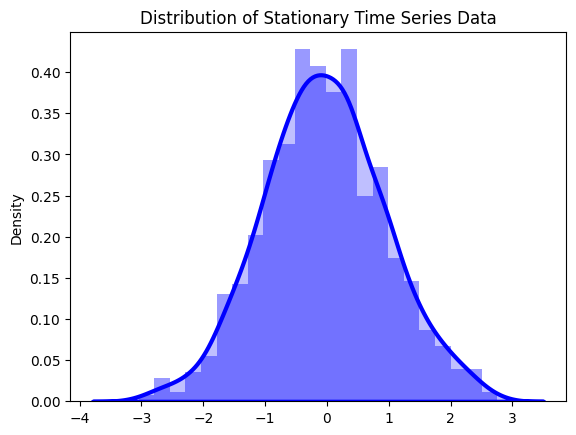

In [16]:
# prompt: 이 데이터를정규분포로 그려줘

import matplotlib.pyplot as plt
import seaborn as sns

# 정규분포로 그리기
sns.distplot(stationary_data, hist=True, kde=True, color='blue', kde_kws={'shade': True, 'linewidth': 3})

# 그래프 제목 설정
plt.title('Distribution of Stationary Time Series Data')

# 그래프 출력
plt.show()


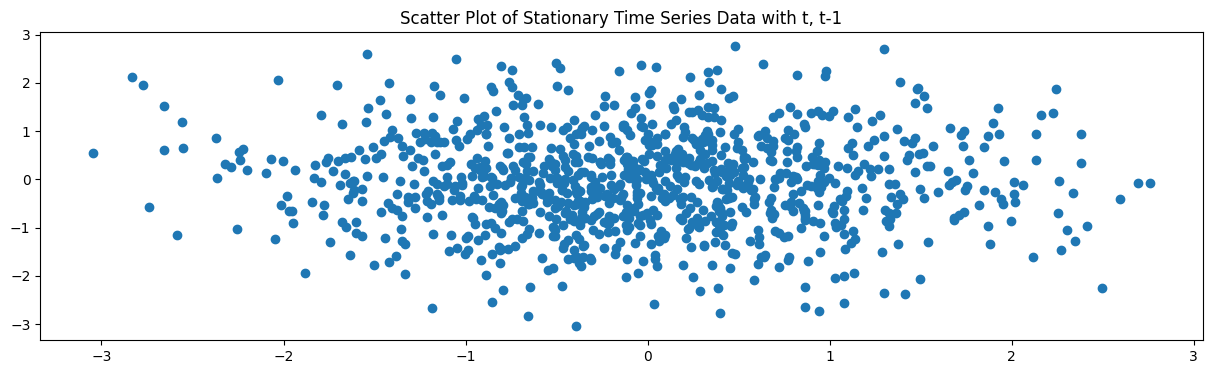

In [23]:
# prompt: stationary_data를 바탕으로1차분 과거와의 scatter plot을

import matplotlib.pyplot as plt
plt.figure(figsize=(15, 4))
plt.scatter(stationary_data[:-1], stationary_data[1:])
plt.title('Scatter Plot of Stationary Time Series Data with t, t-1')
plt.show()

## **과거와의 상관성 (Autocorrelation)**

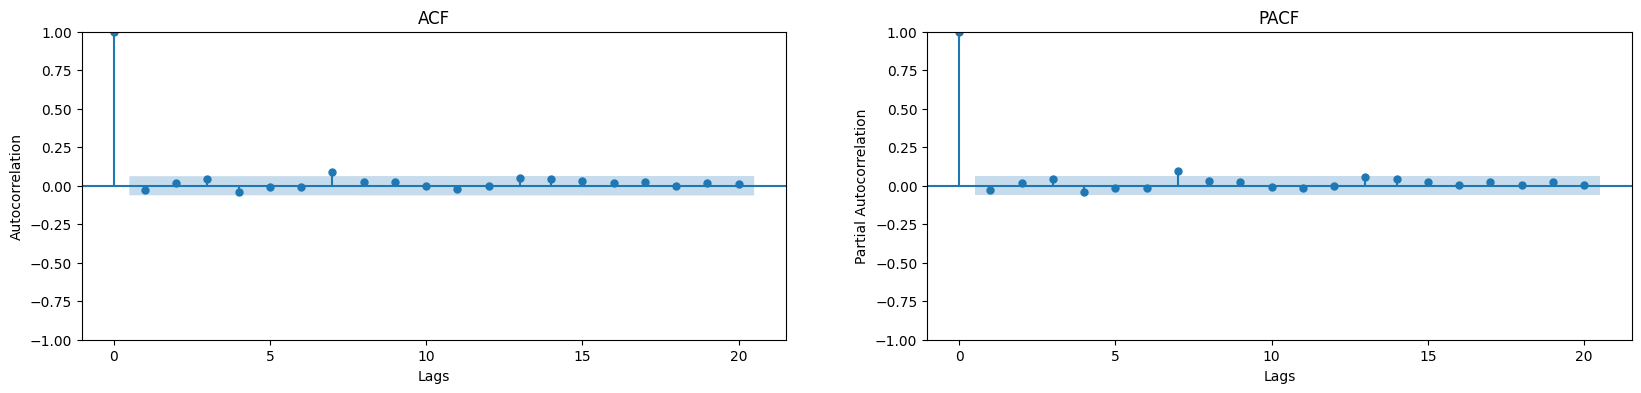

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 시각화 - ACF와 PACF
plt.figure(figsize=(20, 4))
plt.subplot(1, 2, 1)
plot_acf(stationary_series, lags=20, ax=plt.gca())
plt.title('ACF')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')

plt.subplot(1, 2, 2)
plot_pacf(stationary_series, lags=20, ax=plt.gca())
plt.title('PACF')
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')
plt.show()


# **2. 비정상 시계열**
- 이상성은 시계열 데이터에서 일반적인 패턴에서 벗어난 관측값을 의미합니다. 이상치는 데이터의 품질 문제나 실제로 발생한 비정상적인 사건에 의해 나타날 수 있습니다. 이상치 탐지를 위한 방법 중 하나는 IQR (Interquartile Range) 방법

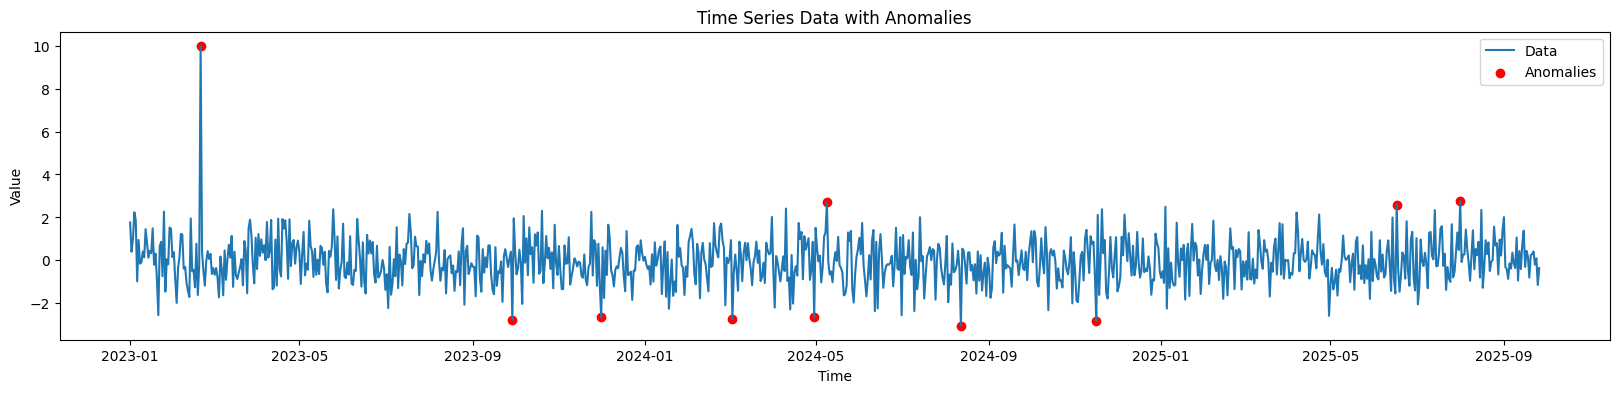

In [37]:
# 이상값을 포함한 시계열 데이터 생성
anomaly_series = stationary_series.copy()
anomaly_series[50] = 10  # 인위적으로 이상값 추가

# IQR 방법을 이용한 이상치 탐지
Q1, Q3 = np.percentile(anomaly_series, [25, 75])
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = np.where((anomaly_series < lower_bound) | (anomaly_series > upper_bound))

# 시각화
plt.figure(figsize=(20, 4))
plt.plot(anomaly_series, label='Data')
plt.scatter(anomaly_series.index[outliers], anomaly_series.iloc[outliers], color='red', label='Anomalies')
plt.title('Time Series Data with Anomalies')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()



In [38]:
# ADF 테스트
adf_result = adfuller(anomaly_series)
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])

ADF Statistic: -11.254897060441255
p-value: 1.6765245015699975e-20


ADF Statistic (Differenced): -12.340754064697439
p-value (Differenced): 6.126445012835458e-23


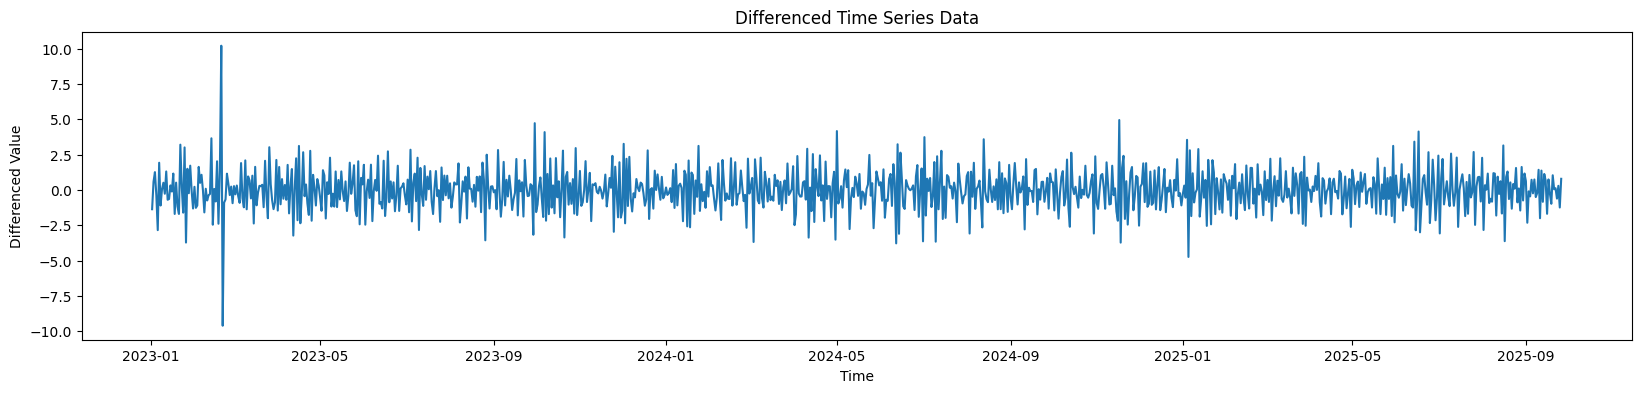

In [40]:
# 1차 차분 수행
diff_series = anomaly_series.diff().dropna()

# 차분 후 정상성 확인
adf_result_diff = adfuller(diff_series)
print('ADF Statistic (Differenced):', adf_result_diff[0])
print('p-value (Differenced):', adf_result_diff[1])

# 시각화
plt.figure(figsize=(20, 4))
plt.plot(diff_series)
plt.title('Differenced Time Series Data')
plt.xlabel('Time')
plt.ylabel('Differenced Value')
plt.show()
